# Lesson 8 Assignment
### Jessica Kunkel

As usual, I run the shebang line first. But this time I decided to take the context from the assignment description and add it to the notebook for clarity when describing the dataset.

In [1]:
#!/usr/bin/env python

### Context
#### Data Set Information
Dataset contains 10 variables, all quantitative, 9 predictors and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.
#### Attribute Information
|Quantitative	|Attributes	|
|---------------|------------|
|Age			|(years)|
|BMI			|(kg/m2)|
|Glucose		|(mg/dL)|
|Insulin		|(µU/mL)|
|HOMA			|		|	
|Leptin			|(ng/mL)|
|Adiponectin	|(µg/mL)|
|Resistin		|(ng/mL)|
|MCP-1			|(pg/dL)|
#### Labels
- 1 = Healthy Controls
- 2 = Patients


I then import the display functions, set the working directory, and import NumPy and pandas.

In [2]:
""" Import display functions and create a function to print outputs to 
Markdown """

from IPython.display import display, Markdown
def printmd(string):
    display(Markdown(string))

""" Import the os module and set the working directory to where the 
breastcancer.csv file is saved """

import os
path = r"C:\Users\jkunk\OneDrive\Documents\_SWENG Masters\9 DAAN 862 - Analytics Programming Python"
os.chdir(path)

In [3]:
""" Import NumPy, pandas, and dataframe """
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### 1. Perform Data exploratory analysis on the data.
First, I imported the Breast Cancer dataset. Then I decided to use the dataframe `info`, `describe`, and `head` functions to get an initial feel for the data.

In [4]:
cancer = pd.read_csv("breastcancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


The results of the `info` function show that there are no null values in the dataset, and all of the data is numerical. Therefore I don't need to perform any data wrangling to fix null values.

In [5]:
cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


The results of the `describe` function give important context to the dataset. 

- The mean age of the subjects is 57 years, with a standard deviation of 16 years, a minumum age of 24, and a maximum age of 89.
- The mean BMI of the subjects is 27.58 kg/m<sup>2</sup>, with a standard deviation of 5.02 kg/m<sup>2</sup>, a minimum BMI of 18.37 kg/m<sup>2</sup>, and a maximum BMI of 38.58 kg/m<sup>2</sup>.
- The mean glucose of the subjects is 97.79 mg/dL, with a standard deviation of 22.53 mg/dL, a minimum glucose of 60 mg/dL, and a maximum glucose of 201 mg/dL.
- The mean insulin of the subjects is 10.01 µU/mL, with a standard deviation of 10.07 µU/mL, a minimum insulin of 2.432 µU/mL, and a maximum insulin of 58.46 µU/mL.
- The mean HOMA of the subjects is 2.695, with a standard deviation of 3.642, a minimum HOMA of 0.4674, and a maximum HOMA of 25.05.
- The mean leptin of the subjects is 26.62 ng/mL, with a standard deviation of 4.311 ng/mL, a minimum leptin of 19.18 ng/mL, and a maximum leptin of 90.28 ng/mL.
- The mean adiponectin of the subjects is 10.18 µg/mL, with a standard deviation of 6.843 µg/mL, a minimum adiponectin of 1.656 µg/mL, and a maximum adiponectin of 38.04 µg/mL.
- The mean resistin of the subjects is 14.73 ng/mL, with a standard deviation of 12.39 ng/mL, a minimum resistin of 3.210 ng/mL, and a maximum resistin of 82.10 ng/mL.
- The mean MCP-1 of the subjects is 534.65 pg/dL, with a standard deviation of 345.91 pg/dL, a minimum MCP-1 of 45.843 pg/dL, and a maximum MCP-1 of 1698.4 pg/dL.
- The `describe` function is less useful in giving context to the Classification attribute of the dataset since it is a categorical value of 1 or 2.

In [6]:
cancer.Classification.value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

The `value_counts` function shows that 64 of the subjects (55.2%) are patients, while 52 of the subjects (44.8%) are healthy controls.

Text(0.5, 0, 'Predicted label')

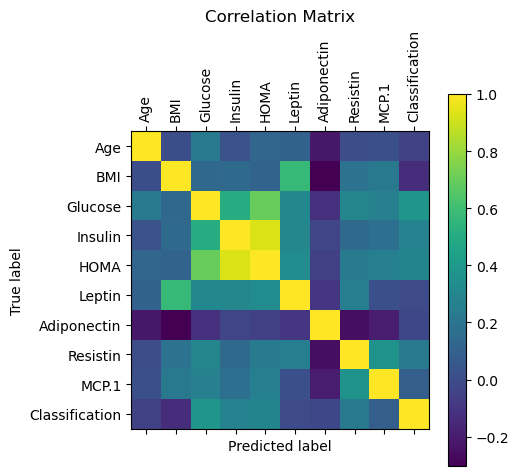

In [7]:
""" Load the necessary packages for logistic regression """
from sklearn.model_selection import train_test_split
from sklearn import metrics

plt.matshow(cancer.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(10), list(cancer.columns), rotation=90)
plt.yticks(range(10), list(cancer.columns))
plt.ylabel('True label')
plt.xlabel('Predicted label')

The plot of the correlation matrix shows a correlation score of about 0.9 between HOMA and Insulin, as well as a correlation score of about 0.7 between Leptin and BMI as well as HOMA and Glucose.

Next, I generated a scatterplot matrix for the data.

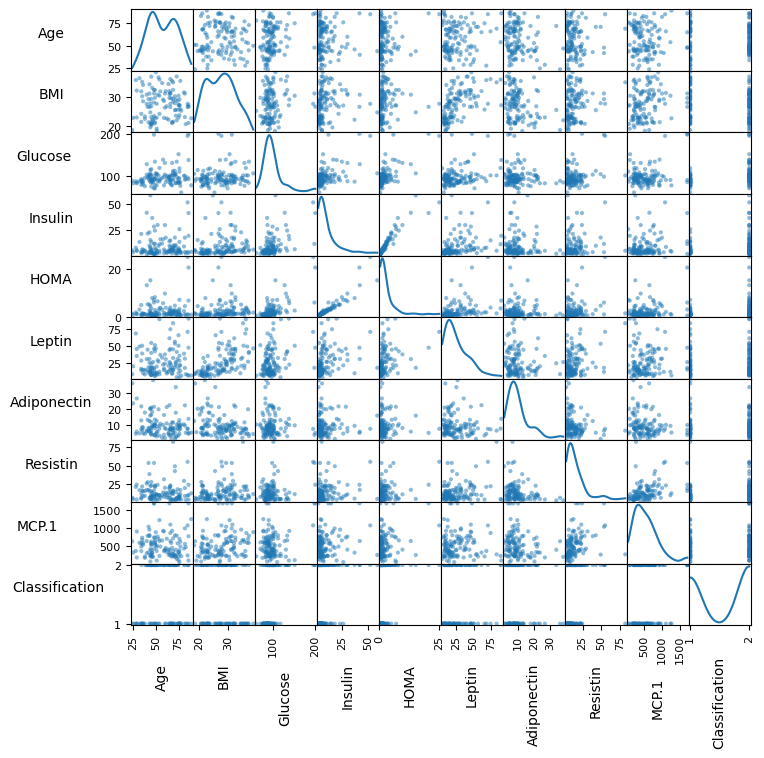

In [8]:
fig = pd.plotting.scatter_matrix(cancer, figsize=[8,8], diagonal='kde')
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

From the scatterplot matrix, the following observations can be made:
- there is a relatively strong correlation between HOMA and Insulin
- there is a loose positive correlation between BMI and Leptin
- the KDE plot for age has two peaks, around 45 and 70
- the KDE plot for BMI has two peaks, around 20 and close to 30
- the KDE plot for Glucose peaks around 100
- the KDE plot for Insulin peaks close to the y-axis, based on the scale possibly around 0-10
- the KDE plot for HOMA peaks close to 0
- the KDE plot for Leptin peaks close to 25
- the KDE plot for Adiponectin peaks around 10
- the KDE plot for resistin peaks around 10
- the KDE plot for MCP.1 peaks around 500
- each plot has a very different scale, and their values should likely be scaled before being entered into supervised learning algorithms

### 2. Use 30% of data as the test set and build a Logistic regression model to predict the Labels variable.

In [9]:
""" Use 30% of data as the test set: includes data preprocessing to ensure appropriate scale """
from sklearn.preprocessing import StandardScaler

X = cancer.iloc[:, 0 : 9]
y = cancer.Classification

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# Use 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In creating the test set, I chose to preprocess the data using a scaler to transform the data to a similar scale. From my exploration of the data, I could see that the variables were in many different unit scales, and I did not want variables with larger values to affect the performance of the supervised learning algorithms.

I then created the logistic regression model using the process outlined in this week's lesson. I utilized my `printmd` function to print the accuracy scores for the training and test sets. 

In [10]:
from sklearn import linear_model

#Model generation
lr = linear_model.LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predict the labels for training and test sets - model evaluation
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

printmd(
    f'The accuracy score for the training set is {
    metrics.accuracy_score(y_train, lr_train_pred)
    }'
)
printmd(
    f'The accuracy score for the test set is {
    metrics.accuracy_score(y_test, lr_test_pred)
    }'
)

The accuracy score for the training set is 0.7777777777777778

The accuracy score for the test set is 0.8285714285714286

I then chose to plot the confusion matrix using the `ConfusionMatrixDisplay` function.

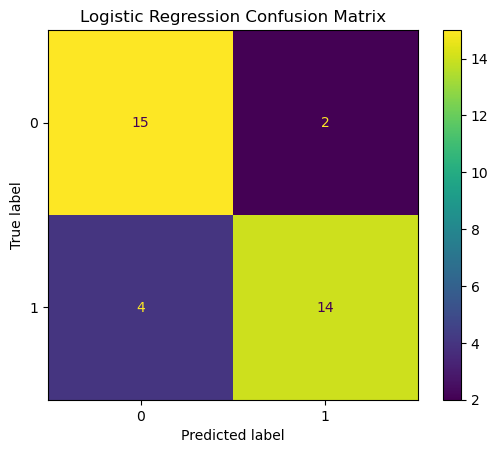

In [11]:
test_cm = metrics.confusion_matrix(y_test, lr_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The confusion matrix shows a higher number of true negatives (15) and true positives (14) than false negatives (4) and false positives (2) for classification of healthy control vs patient. 

This suggests that the logistic regression classification method is performing relatively well.

In [12]:
print(metrics.classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       0.88      0.78      0.82        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



The Classification Report shows a relatively high precision at predicting patients (0.88), and an accuracy of 0.83 on the test set. The overall precision, recall, and f-score are also 0.83. This supports the suggestion that the logistic classification method performs relatively well on the test set.

In addition, I calculated to ROC-AUC score and generated a plot of the ROC curve for the logistic classification method.

AUC-ROC Score: 0.83

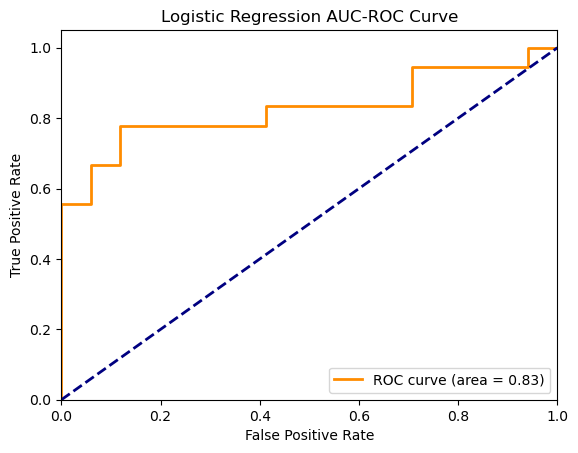

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

lr_test_probs = lr.predict_proba(X_test)[:, 1]

lr_roc_auc = roc_auc_score(y_test, lr_test_probs)
printmd(f"AUC-ROC Score: {lr_roc_auc:.2f}")

# Plotting the ROC Curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_test_probs, pos_label=2)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the AUC-ROC score being 0.83 show that the logistic regression model is relatively good at distinguishing between classes in the dataset.

### 3. Build the Naïve Bayes model to predict the Labels variable.

As in the Logistic Regression model, I used the method outlined in this week's lesson notes to generate the Naive Bayes model, and evaluated the model using the same metrics and methodologies as in the Logistic Regression model.

In [14]:
from sklearn.naive_bayes import GaussianNB

# Model Generation
NB = GaussianNB()
NB.fit(X_train, y_train)

# Model evaluation
NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

printmd(
    f'The accuracy score for the training set is {
    metrics.accuracy_score(y_train, NB_train_pred)
    }'
)
printmd(
    f'The accuracy score for the test set is {
    metrics.accuracy_score(y_test, NB_test_pred)
    }'
)

The accuracy score for the training set is 0.6049382716049383

The accuracy score for the test set is 0.6571428571428571

I then generated and displayed the confusion matrix for the test set.

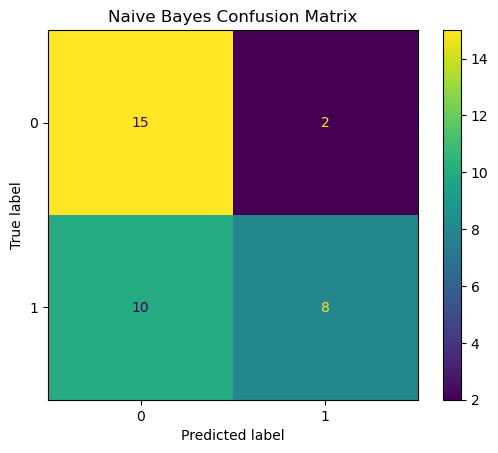

In [15]:
test_cm = metrics.confusion_matrix(y_test, NB_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

The confusion matrix shows a higher number of true negatives (15), but the number of and true positives (8) is lower than in the Logistic Regression model, and the number of false negatives (10) is higher than in the Logistic Regression model. The number of false positives (2) is the same as that of the Logistic Regression model for classification of healthy control vs patient. 

This suggests that the Naive Bayes model is not performing as well on this dataset as the Logistic Regression model, and the high number of false negatives indicates that the Naive Bayes model is frequently missing the correct classification.

In [16]:
print(metrics.classification_report(y_test, NB_test_pred))

              precision    recall  f1-score   support

           1       0.60      0.88      0.71        17
           2       0.80      0.44      0.57        18

    accuracy                           0.66        35
   macro avg       0.70      0.66      0.64        35
weighted avg       0.70      0.66      0.64        35



The Classification Report shows a relatively high precision at predicting patients (0.8), but an overall accuracy of only 0.66 on the test set. The overall precision is 0.7, the recall is 0.66, and the f1-score is only 0.64. This supports the suggestion that the Naive Bayes model is not performing as well as expected on the test set. 

In addition, I calculated to ROC-AUC score and generated a plot of the ROC curve for the Naive Bayes model.

AUC-ROC Score: 0.83

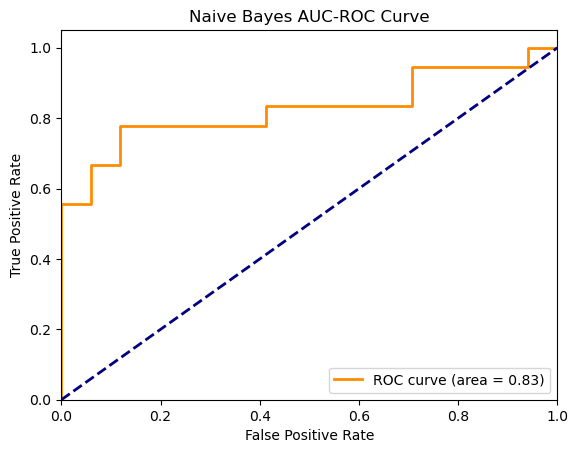

In [17]:
NB_test_probs = lr.predict_proba(X_test)[:, 1]

NB_roc_auc = roc_auc_score(y_test, NB_test_probs)
printmd(f"AUC-ROC Score: {NB_roc_auc:.2f}")

# Plotting the ROC Curve
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_test_probs, pos_label=2)
NB_roc_auc = auc(NB_fpr, NB_tpr)

plt.figure()
plt.plot(NB_fpr, NB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {NB_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the AUC-ROC score being 0.83 show that the Naive Bayes model is relatively good at distinguishing between classes in the dataset.

### 4. Build the Decision tree model to predict the Labels variable.

As in the previous models, I used the method outlined in this week's lesson notes to generate the Decision Tree model, and evaluated the model using the same metrics and methodologies as in the Logistic Regression and Naive Bayes models.

In [18]:
from sklearn import tree

# Model generation
DT = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5)
DT.fit(X_train, y_train)

# Model evaluation
DT_train_pred = DT.predict(X_train)
DT_test_pred = DT.predict(X_test)

printmd(
    f'The accuracy score for the training set is {
    metrics.accuracy_score(y_train, DT_train_pred)
    }'
)
printmd(
    f'The accuracy score for the test set is {
    metrics.accuracy_score(y_test, DT_test_pred)
    }'
)

The accuracy score for the training set is 0.9876543209876543

The accuracy score for the test set is 0.8

As above, I generated and displayed the confusion matrix for the test set.

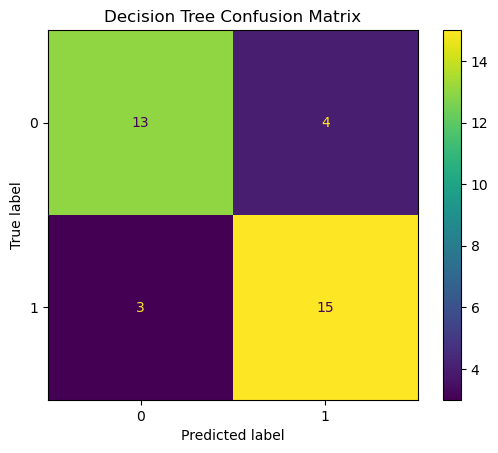

In [19]:
test_cm = metrics.confusion_matrix(y_test, DT_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

The confusion matrix shows 13 true negatives and 15 true positives. This differs from the Logistic Regression model and Naive Bayes model, which both had a higher number of true negatives. The number of false negatives (3) and false positives (4) are lower in the Decision Tree Model than in the Naive Bayes model, similar to the values seen in the Logistic Regression model. 

This suggests that the Decision Tree is doing reasonably well at predicting classifications.

In [20]:
print(metrics.classification_report(y_test, DT_test_pred))

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.79      0.83      0.81        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



The Classification Report shows a relatively high precision at predicting both patients (0.79) and healthy control subjects (0.81). The overall accuracy score is 0.80, and the average precision, recall, and f1-scores are also 0.80.

This supports the suggestion that the Decision Tree model is performing relatively well at predicting control vs patient classifications, with values similar to but slightly less than those of the Logistic Regression model.

In addition, I calculated to ROC-AUC score and generated a plot of the ROC curve for the Decision Tree model.

AUC-ROC Score: 0.83

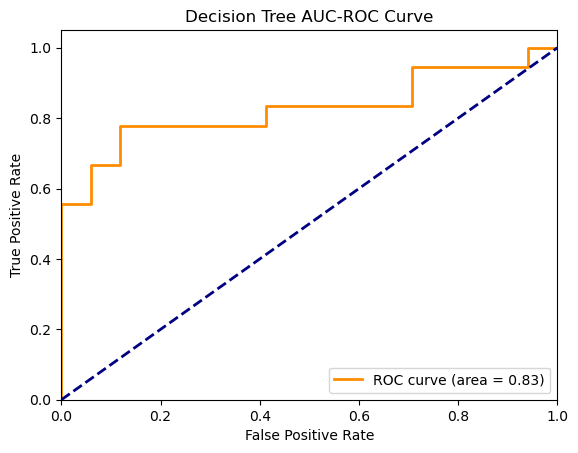

In [21]:
DT_test_probs = lr.predict_proba(X_test)[:, 1]

DT_roc_auc = roc_auc_score(y_test, DT_test_probs)
printmd(f"AUC-ROC Score: {DT_roc_auc:.2f}")

# Plotting the ROC Curve
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT_test_probs, pos_label=2)
DT_roc_auc = auc(DT_fpr, DT_tpr)

plt.figure()
plt.plot(DT_fpr, DT_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the AUC-ROC score being 0.83 show that the Decision Tree model is relatively good at distinguishing between classes in the dataset, but does not have as strong of performance as the logistic regression model.

### 5. Build the Neural network model to predict the Labels variable.

As in the previous models, I used the method outlined in this week's lesson notes to generate the Neural Network model, including preprocessing the data with `MinMaxScaler` to ensure the data was in the range [0, 1]. I then evaluated the model using the same metrics and methodologies as in the previous models.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# data preprocessing
mmscaler = MinMaxScaler()

X_train_scaled = mmscaler.fit_transform(X_train)
X_test_scaled = mmscaler.transform(X_test)

# Model Generation
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4), random_state=1)
NN.fit(X_train_scaled, y_train)

# Model Evaluation
NN_train_pred = NN.predict(X_train_scaled)
NN_test_pred = NN.predict(X_test_scaled)

printmd(
    f'The accuracy score for the training set is {
    metrics.accuracy_score(y_train, NN_train_pred)
    }'
)
printmd(
    f'The accuracy score for the test set is {
    metrics.accuracy_score(y_test, NN_test_pred)
    }'
)

The accuracy score for the training set is 0.8765432098765432

The accuracy score for the test set is 0.7428571428571429

As above, I generated and displayed the confusion matrix for the test set.

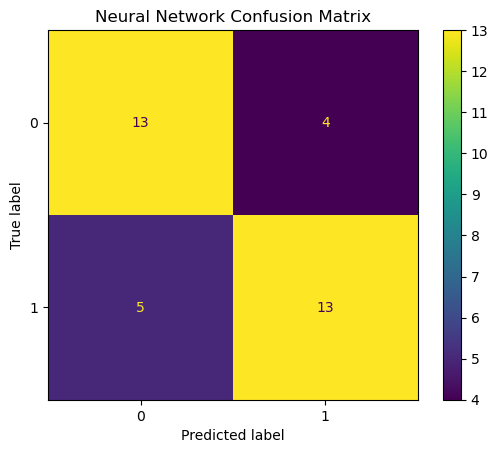

In [23]:
train_cm = metrics.confusion_matrix(y_train, NN_train_pred)
test_cm = metrics.confusion_matrix(y_test, NN_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Neural Network Confusion Matrix')
plt.show()

The confusion matrix shows an equal number of true positive and true negative predictions (13), and a lower number of false negatives (5) and false positives (4) than true predictions. 

These values are similar to the Logistic Regression and Decision Tree models, but indicate a slightly poorer performance of the Neural Network on the test set.

In [24]:
print(metrics.classification_report(y_test, NN_test_pred))

              precision    recall  f1-score   support

           1       0.72      0.76      0.74        17
           2       0.76      0.72      0.74        18

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



The Classification Report shows a middling precision at predicting both patients (0.76) and healthy control subjects (0.72). The overall accuracy score is 0.74, and the average precision, recall, and f1-scores are also 0.74. These scores show that the Neural Network is not performing as well as the Logistic Regression and Decision Tree models, but show better performance than the Naive Bayes model. 

This suggests middling performance of the Neural Network model on the test set.

In addition, I calculated to ROC-AUC score and generated a plot of the ROC curve for the Neural Network model.

AUC-ROC Score: 0.89

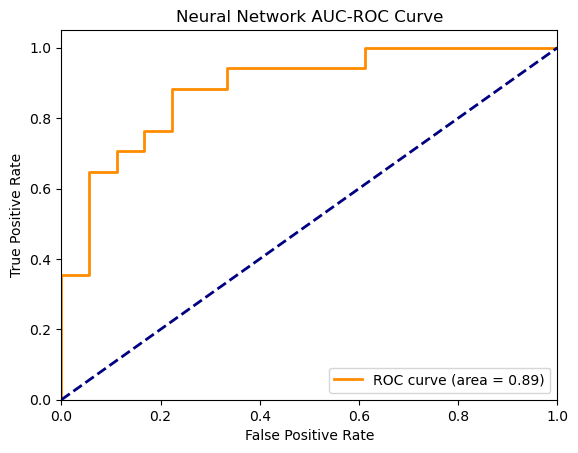

In [25]:
NN_test_probs = lr.predict_proba(X_test)[:, 1]

NN_roc_auc = roc_auc_score(NN_test_pred, NN_test_probs)
printmd(f"AUC-ROC Score: {NN_roc_auc:.2f}")

# Plotting the ROC Curve
NN_fpr, NN_tpr, NN_thresholds = roc_curve(NN_test_pred, NN_test_probs, pos_label=2)
NN_roc_auc = auc(NN_fpr, NN_tpr)

plt.figure()
plt.plot(NN_fpr, NN_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {NN_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the AUC-ROC score being 0.89 show that the Neural Network model is relatively good at distinguishing between classes in the dataset, with stronger performance than the logistic regression, Naive Bayes, and Decision Tree models.

### 6. Which model is the best? Which variable is the most important one?

To first determine which model is the best, I decided to aggregate the information that I had gathered over the course of building the four classification models. This included summarizing the confusion matrices and the classification report results.

In [26]:
"""Aggregation of confusion matrices"""

cm_data = [
    [15,15,13,13],
    [14,8,15,13],
    [4,10,3,5],
    [2,2,4,4]
]
cm_df = pd.DataFrame(cm_data, 
                  columns=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Neural Net'], 
                  index=['True Negative','True Positive','False Negative','False Positive'])
cm_df

,Logistic Regression,Naive Bayes,Decision Tree,Neural Net
True Negative,15,15,13,13
True Positive,14,8,15,13
False Negative,4,10,3,5
False Positive,2,2,4,4


The model with the highest number of true negative and true positive predictions is the Logistic Regression model with 15 true negative and 14 true positive predictions (total 29 accurate predictions of 35 predictions).

In [27]:
cl_rep_index = ['Accuracy', 'Precision (Healthy)', 'Precision (Patient)', 'Precision (Average)',
               'Recall (Healthy)', 'Recall (Patient)', 'Recall (Average)',
               'F1-Score (Healthy)', 'F1-Score (Patient)', 'F1-Score (Average)']

cl_rep_data = [
    [0.83, 0.66, 0.80, 0.74],
    [0.79, 0.60, 0.81, 0.72],
    [0.88, 0.80, 0.79, 0.76],
    [0.83, 0.70, 0.80, 0.74],
    [0.88, 0.88, 0.76, 0.76],
    [0.78, 0.44, 0.83, 0.72],
    [0.73, 0.66, 0.80, 0.74],
    [0.83, 0.71, 0.79, 0.74],
    [0.82, 0.57, 0.81, 0.74],
    [0.83, 0.64, 0.80, 0.74],
]

cl_rep_df = pd.DataFrame(cl_rep_data,
                        columns=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Neural Net'],
                        index=cl_rep_index)

cl_rep_df

,Logistic Regression,Naive Bayes,Decision Tree,Neural Net
Accuracy,0.83,0.66,0.80,0.74
Precision (Healthy),0.79,0.60,0.81,0.72
Precision (Patient),0.88,0.80,0.79,0.76
Precision (Average),0.83,0.70,0.80,0.74
Recall (Healthy),0.88,0.88,0.76,0.76
Recall (Patient),0.78,0.44,0.83,0.72
Recall (Average),0.73,0.66,0.80,0.74
F1-Score (Healthy),0.83,0.71,0.79,0.74
F1-Score (Patient),0.82,0.57,0.81,0.74
F1-Score (Average),0.83,0.64,0.80,0.74


The model with the highest accuracy score is the Logistic Regression model, with an accuracy score of 0.83. The Logistic Regression model also had the highest average precision (0.83) and average F1-score (0.83). However, the Decision Tree model had the highest average recall (0.80).

Finally, a comparison was made between the ROC curves for each model.

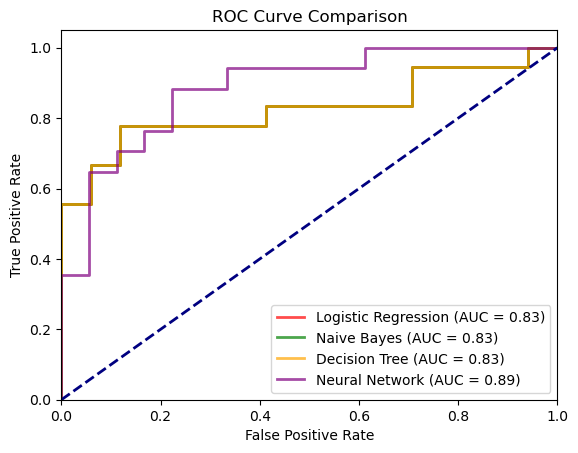

In [28]:
# Plot logistic regression
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, alpha=0.7, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
# Plot Naive Bayes
plt.plot(NB_fpr, NB_tpr, color='green', lw=2, alpha=0.7, label=f'Naive Bayes (AUC = {NB_roc_auc:.2f})')
# Plot Decision Tree
plt.plot(DT_fpr, DT_tpr, color='orange', lw=2, alpha=0.7, label=f'Decision Tree (AUC = {DT_roc_auc:.2f})')
# Plot Neural Network
plt.plot(NN_fpr, NN_tpr, color='purple', lw=2, alpha=0.7, label=f'Neural Network (AUC = {NN_roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

Side by side, it an easily be seen that the Neural Network model has the strongest ability to distinguish between healthy controls and cancer patients in the dataset, with a AUC-ROC score of 0.89. 

Overall, the evaluation suggests that the Logistic Regression model had the best performance in predicting subject classification in the Breast Cancer Coimbra Data Set.

---

To evaluate which variable is the most important in predicting the classification of subjects in the Breast Cancer Coimbra Data Set, I used the `feature_importances_` attribute of the Decision Tree model, displayed as a dataframe.

In [29]:
DataFrame({'variable':cancer.columns[:9],
          'importance':DT.feature_importances_})

,variable,importance
0,Age,0.116292
1,BMI,0.150526
2,Glucose,0.359399
3,Insulin,0.060736
4,HOMA,0.000000
5,Leptin,0.072598
6,Adiponectin,0.134979
7,Resistin,0.046488
8,MCP.1,0.058981


The result of the `feature_importances_` attribute suggests that Glucose is the most important variable, with the highest importance score of 0.359. 

BMI followed with an importance score of 0.151, and Adiponectin had the third-highest score of 0.135.